# PyTorch ResNet-50 CIFAR-10 Benchmarks

## device=cpu w/o Intel Extension for PyTorch

In [2]:
import torch
import torchvision

In [3]:
LR = 0.001
DOWNLOAD = True
DATA = 'datasets/cifar10/'
device = 'cpu'

In [4]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=True,
        transform=transform,
        download=DOWNLOAD
)

train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=128,
        
)

57.6%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
model = torchvision.models.resnet50()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [6]:
%%time

loss_plot = []

model.train()

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 7.409843
batch_idx: 1 [128/50000 (0%)]	Loss: 7.105022
batch_idx: 2 [256/50000 (1%)]	Loss: 6.716725
batch_idx: 3 [384/50000 (1%)]	Loss: 6.153116
batch_idx: 4 [512/50000 (1%)]	Loss: 5.545532
batch_idx: 5 [640/50000 (1%)]	Loss: 4.934961
batch_idx: 6 [768/50000 (2%)]	Loss: 4.450016
batch_idx: 7 [896/50000 (2%)]	Loss: 3.772540
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.295415
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.793258
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.650102
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.557256
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.451328
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.390362
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.233871
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.376015
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.309158
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.436801
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.335729
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.377710
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.300738
batch_idx: 21 [2688/50000 (5%)]	L

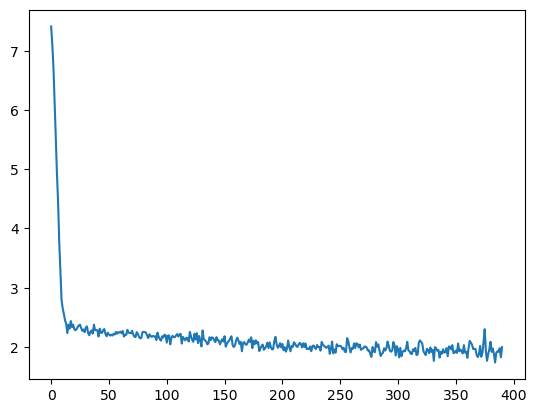

In [7]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [8]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [9]:
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [10]:
%%time

model.eval()

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Accuracy of the network on the 10000 test images: 29 %
CPU times: user 35min 44s, sys: 3min 40s, total: 39min 25s
Wall time: 4min 56s


## device=cpu w/ Intel Extension for PyTorch (float32)

In [43]:
!pip install intel_extension_for_pytorch
import intel_extension_for_pytorch as ipex

In [44]:
model = torchvision.models.resnet50()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [45]:
%%time

loss_plot = []

model.train()
model, optimizer = ipex.optimize(model, optimizer=optimizer)

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 7.348340
batch_idx: 1 [128/50000 (0%)]	Loss: 7.151281
batch_idx: 2 [256/50000 (1%)]	Loss: 6.902226
batch_idx: 3 [384/50000 (1%)]	Loss: 6.612490
batch_idx: 4 [512/50000 (1%)]	Loss: 5.965646
batch_idx: 5 [640/50000 (1%)]	Loss: 5.248378
batch_idx: 6 [768/50000 (2%)]	Loss: 4.736120
batch_idx: 7 [896/50000 (2%)]	Loss: 4.102232
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.640735
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.885308
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.750828
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.725242
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.607177
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.379016
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.284992
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.427536
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.377843
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.515057
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.403667
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.426204
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.369801
batch_idx: 21 [2688/50000 (5%)]	L

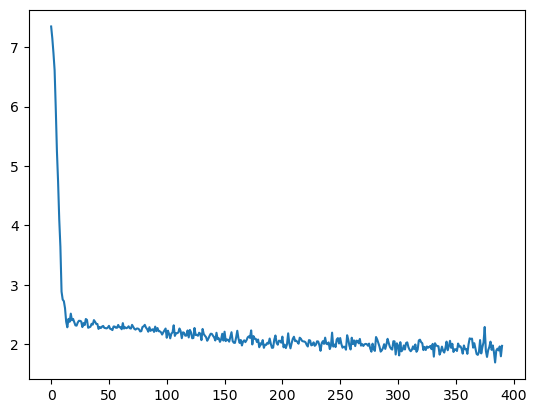

In [46]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [47]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [48]:
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
%%time

model.eval()

model = ipex.optimize(model)

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified


## device=cpu w/ Intel Extension for PyTorch (bfloat16)

In [22]:
model = torchvision.models.resnet50()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [23]:
%%time

loss_plot = []

model.train()
model, optimizer = ipex.optimize(model, optimizer=optimizer, dtype=torch.bfloat16)

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    with torch.cpu.amp.autocast():
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 6.735477
batch_idx: 1 [128/50000 (0%)]	Loss: 6.701250
batch_idx: 2 [256/50000 (1%)]	Loss: 6.311992
batch_idx: 3 [384/50000 (1%)]	Loss: 5.954951
batch_idx: 4 [512/50000 (1%)]	Loss: 5.438689
batch_idx: 5 [640/50000 (1%)]	Loss: 4.797380
batch_idx: 6 [768/50000 (2%)]	Loss: 4.270385
batch_idx: 7 [896/50000 (2%)]	Loss: 3.807435
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.138110
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.819407
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.694561
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.583472
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.559621
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.410928
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.318965
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.391127
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.359355
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.444994
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.371105
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.353149
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.305512
batch_idx: 21 [2688/50000 (5%)]	L

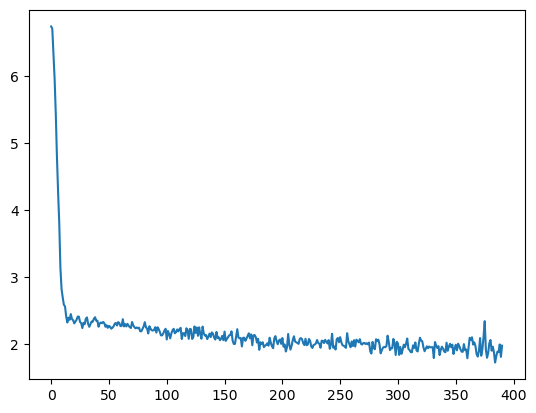

In [24]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [32]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [33]:
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [34]:
%%time

model.eval()

model = ipex.optimize(model, dtype=torch.bfloat16)

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        with torch.cpu.amp.autocast():
            model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified


RuntimeError: The size of tensor a (80) must match the size of tensor b (128) at non-singleton dimension 0